In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
pd.set_option("display.max_columns", None)

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Book1.csv')

In [ ]:
dataset.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ap_hi,ap_lo
0,0,1,1,1,40,1,0,0,0,0,1,0,1,0,5,18,15,1,0,9,4,3,110,80
1,0,0,0,0,25,1,0,0,1,0,0,0,0,1,3,0,0,0,0,7,6,1,140,90
2,0,1,1,1,28,0,0,0,0,1,0,0,1,1,5,30,30,1,0,9,4,8,130,70
3,0,1,0,1,27,0,0,0,1,1,1,0,1,0,2,0,0,0,0,11,3,6,150,100
4,0,1,1,1,24,0,0,0,1,1,1,0,1,0,2,3,0,0,0,11,5,4,100,60


In [ ]:
dataset.isnull().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
ap_hi                   0
ap_lo                   0
dtype: int64

In [ ]:
data_cols = ['HighBP', 'HighChol', 'BMI', 'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'Sex', 'Age','ap_hi','ap_lo']

In [ ]:
data = dataset[data_cols]

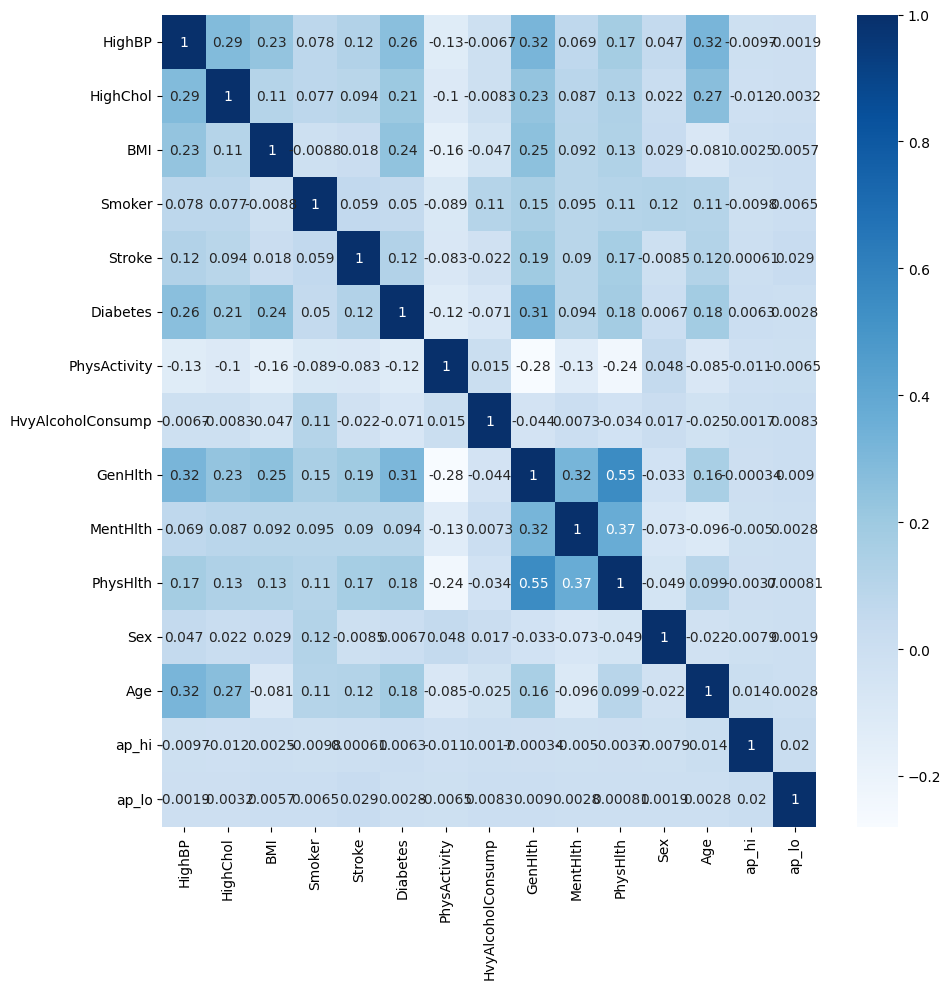

In [ ]:
plt.figure(figsize=(10, 10))
correlation=data.corr(numeric_only=True)
sns.heatmap(correlation, annot=True, cmap='Blues')
plt.tight_layout()

In [ ]:
normal_list = (list(data['MentHlth'].unique()))
normal_list.sort()
print(normal_list)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


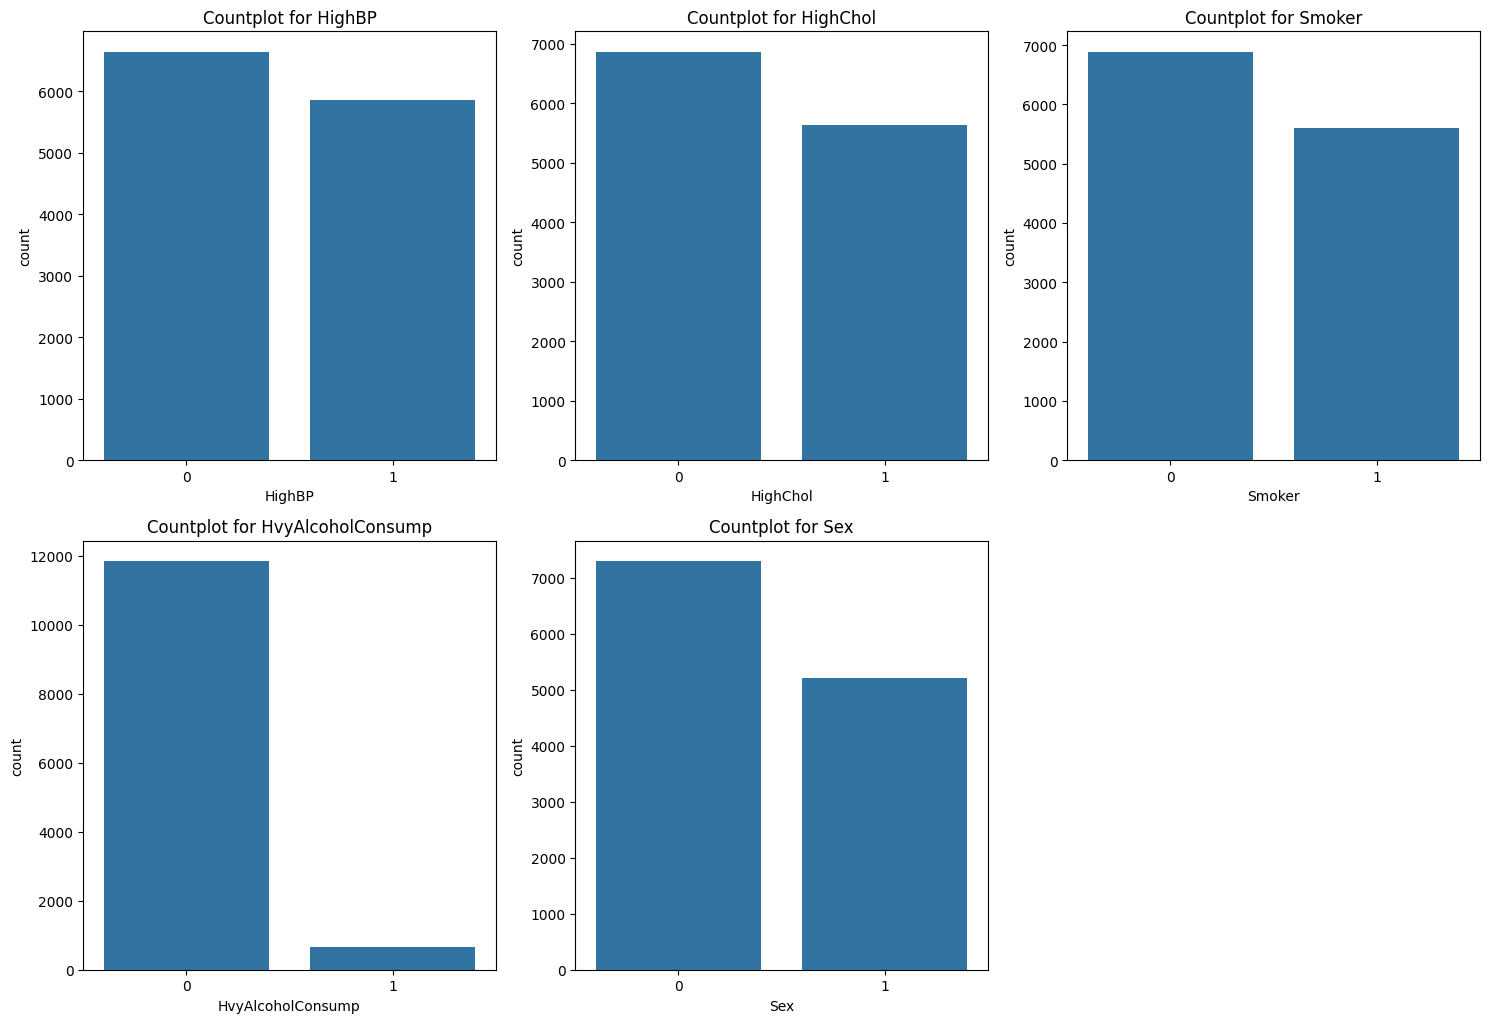

In [ ]:
categorical_features = ['HighBP', 'HighChol', 'Smoker', 'HvyAlcoholConsump', 'Sex']

plt.figure(figsize=(15, 15))
for i, var in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=var, data=data)
    plt.title(f"Countplot for {var}")
plt.tight_layout()
plt.show()

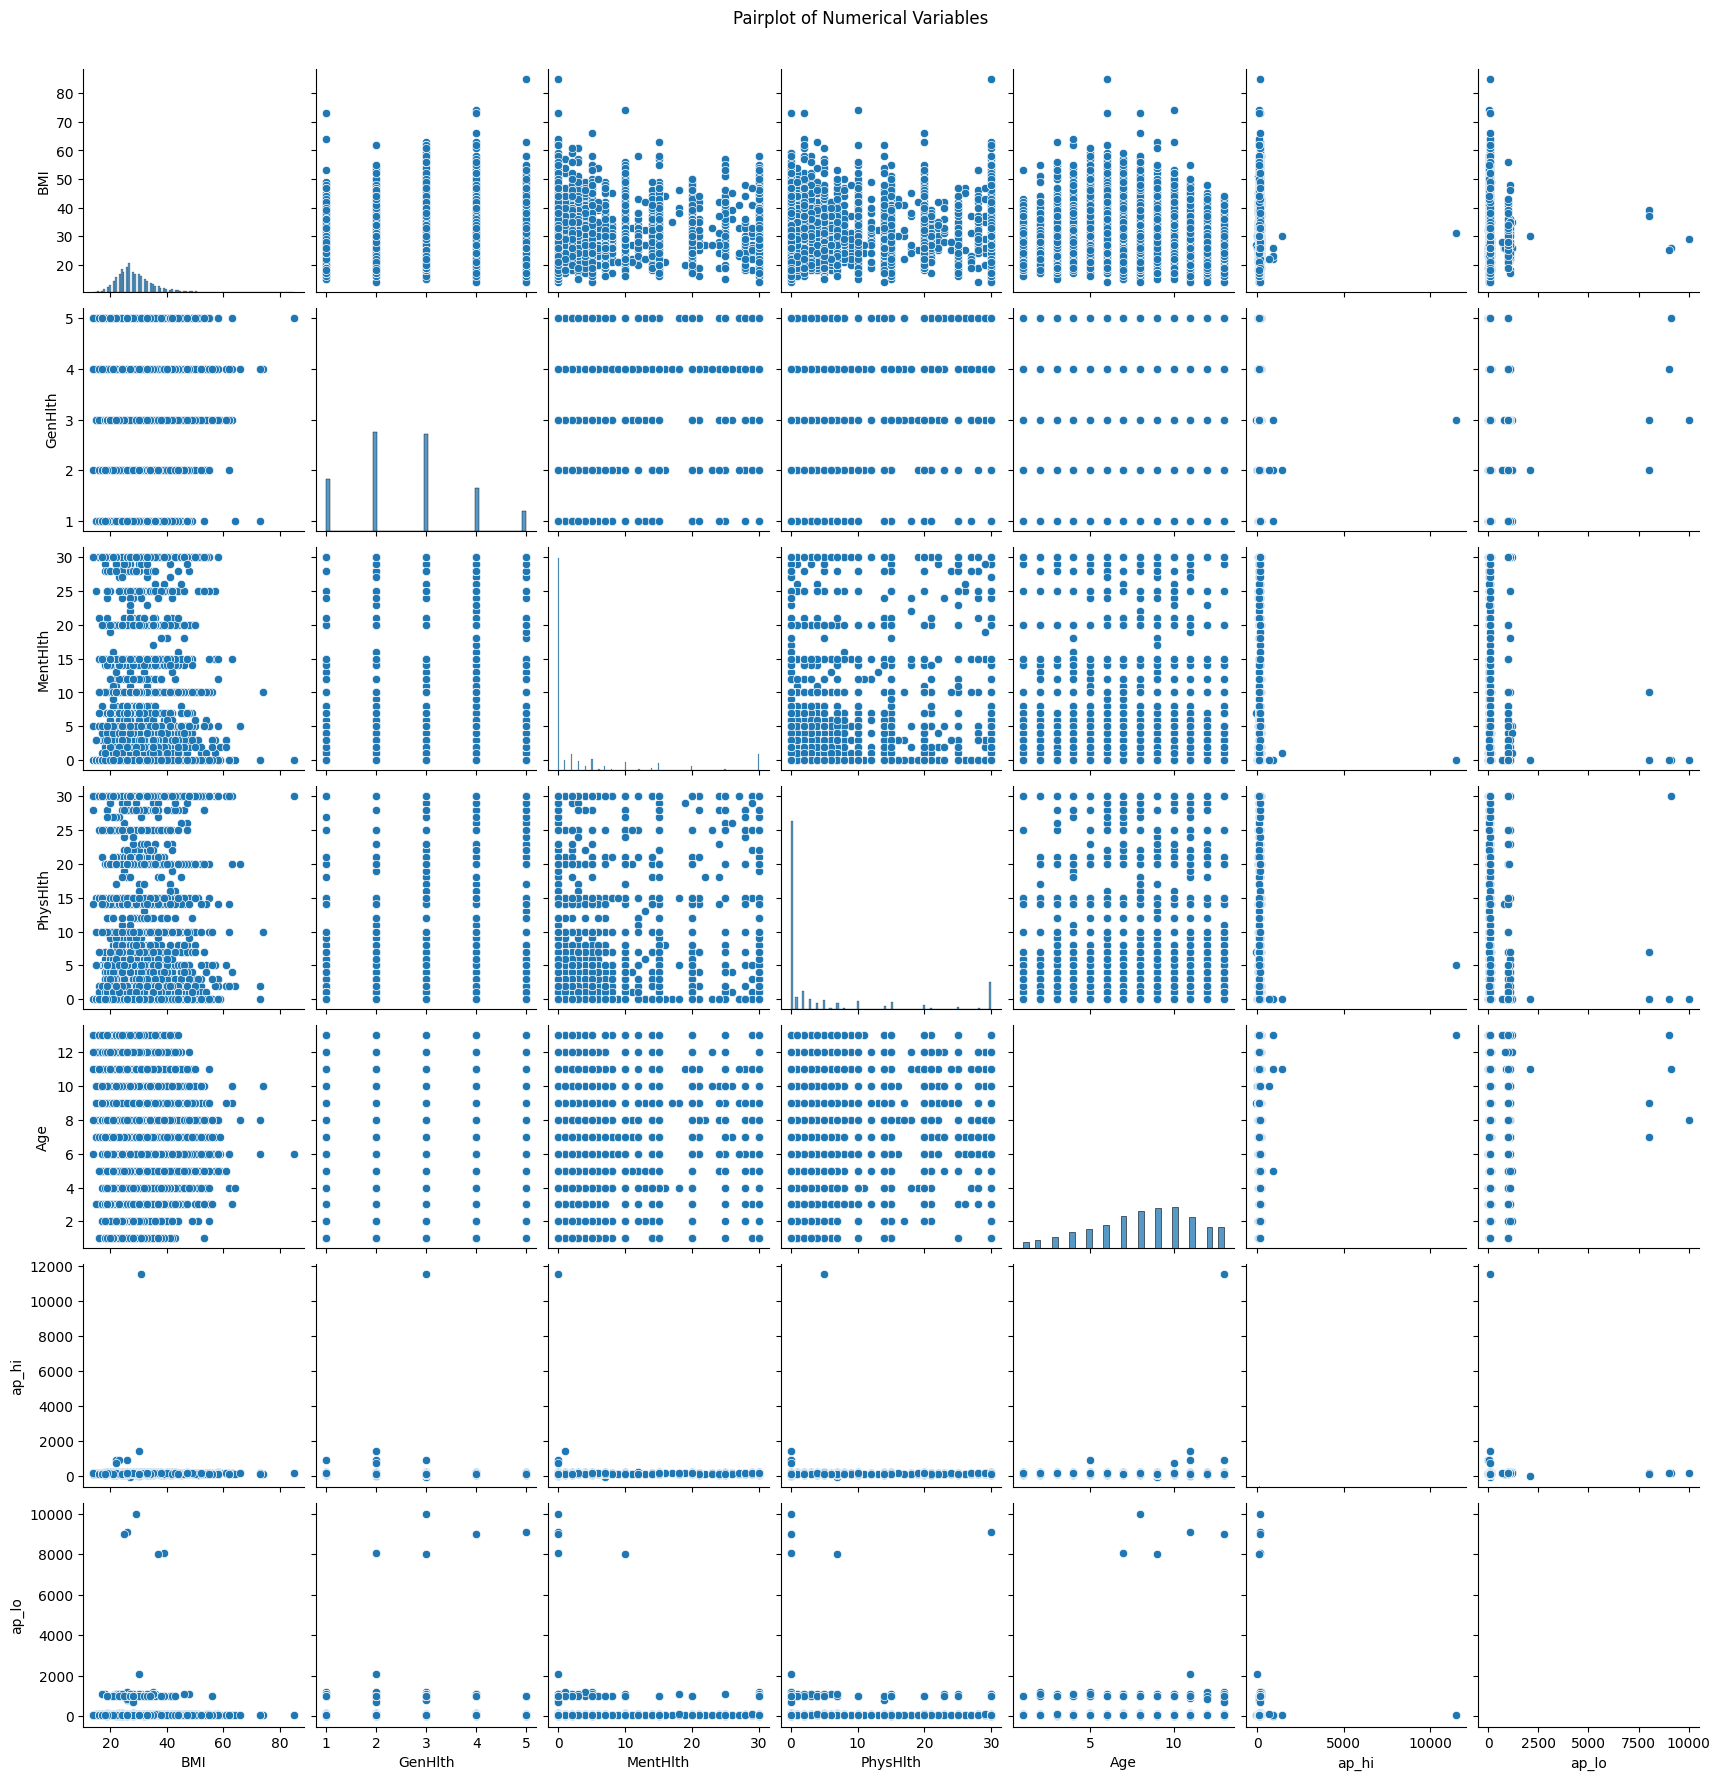

In [ ]:
sns.pairplot(data[['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age','ap_hi','ap_lo']])
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()


In [ ]:
rf_params = {
    'n_estimators' : [10, 50, 100, 200],
}

dt_params = {
    'max_depth' : [None, 10, 20, 30]
}


In [ ]:
X = data.drop('Stroke', axis=1)
Y = data['Stroke']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

In [ ]:
dt_model = DecisionTreeClassifier()
dt_grid_search = GridSearchCV(dt_model, dt_params, cv=5)
dt_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30]})

In [ ]:
dt_pred = dt_grid_search.predict(X_test)
print("Decision Tree Best Parameters: ", dt_grid_search.best_params_)
print("Decision Tree Accuracy: ", accuracy_score(y_test, dt_pred))

Decision Tree Best Parameters:  {'max_depth': 10}
Decision Tree Accuracy:  0.9388


In [ ]:
rf_model = RandomForestClassifier()
rf_grid_search = GridSearchCV(rf_model, rf_params, cv=5)
rf_grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [10, 50, 100, 200]})

In [ ]:
rf_pred = rf_grid_search.predict(X_test)
print("Random Forest Best Parameters:", rf_grid_search.best_params_)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))

Random Forest Best Parameters: {'n_estimators': 200}
Random Forest Accuracy: 0.9512


In [ ]:
import lightgbm as lgb

In [ ]:
train_data = lgb.Dataset(X_train, label=y_train)
params = {
    "objective": "binary",
    "metric": "binary_logloss",
    "boosting_type": "gbdt",
    "num_leaves": 31,
    "learning_rate": 0.05,
    "feature_fraction": 0.9,
    "bagging_fraction": 0.8,
    "bagging_freq": 5,
    "verbose": 0,
}

In [ ]:
model = lgb.train(params, train_data, 100)
y_pred = model.predict(X_test, num_iteration=model.best_iteration)
y_pred_binary = (y_pred > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred_binary)

In [ ]:
print(f"Accuracy: {accuracy }")

Accuracy: 0.9524


In [ ]:
import joblib

joblib.dump(model, 'model.joblib')

['model.joblib']